# Campaign Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloading and reading the shopping csv file

In [ ]:
df = pd.read_csv("campaign.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,2,11,4,0,0,0,0,0,0,US
2235,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,0,3,8,0,0,0,0,0,0,SP
2236,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,1,5,8,0,0,0,0,0,0,SP
2237,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,4,10,3,0,0,0,0,0,0,IND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

Unique number of values for specific categorical columns

In [ ]:
columns_list = df[['ID', 'Education', 'Marital_Status', 'Country']]

for columns in columns_list.columns:
  unique_count = columns_list[columns].nunique()
  print(columns, "-", unique_count)

ID - 2239
Education - 5
Marital_Status - 8
Country - 8


Checking for the presence of null values in dataset.

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


shape of the dataset

In [ ]:
df.shape

(2239, 27)

summary statistics of the dataset

In [ ]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Income'] = df['Income'].fillna(0).astype(int)

In [ ]:
selected_variables = df[['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

summary_df = selected_variables.describe()
summary_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,51412.792765,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213
std,22069.582225,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34716.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51039.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Distribution of the numerical features in the dataset

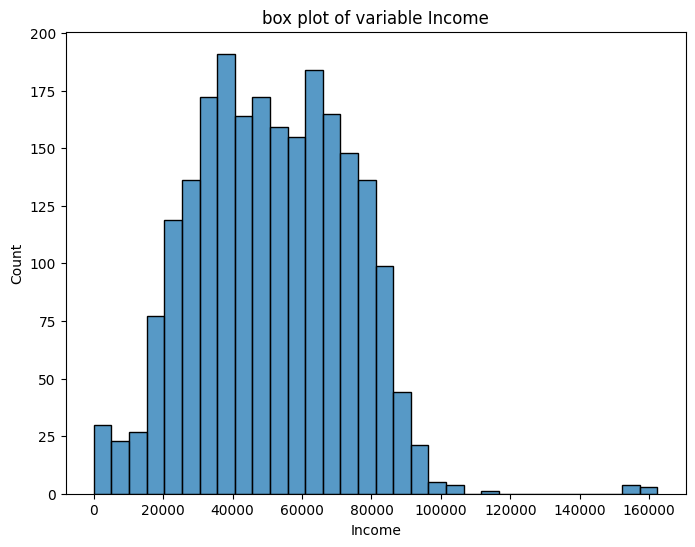

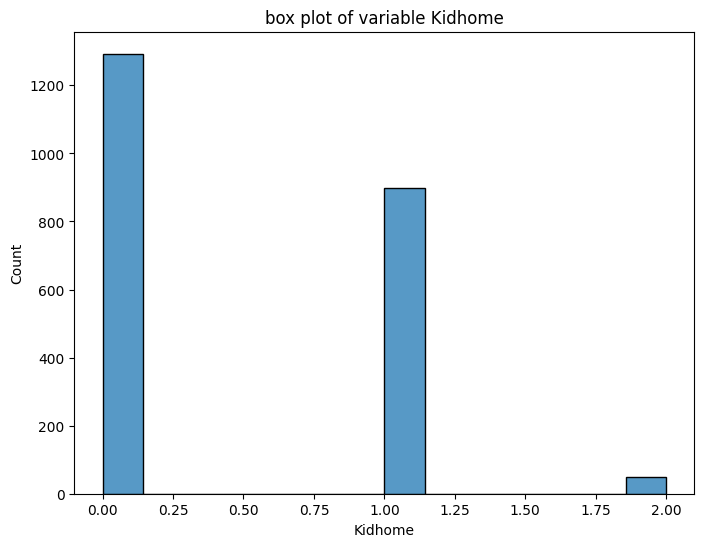

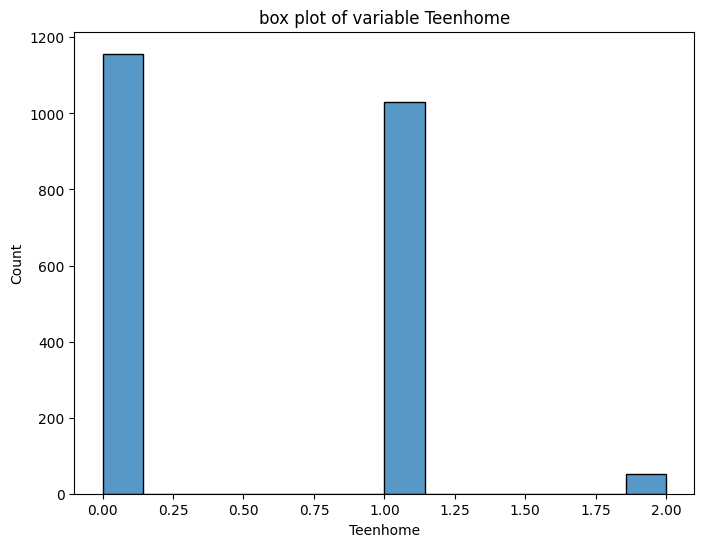

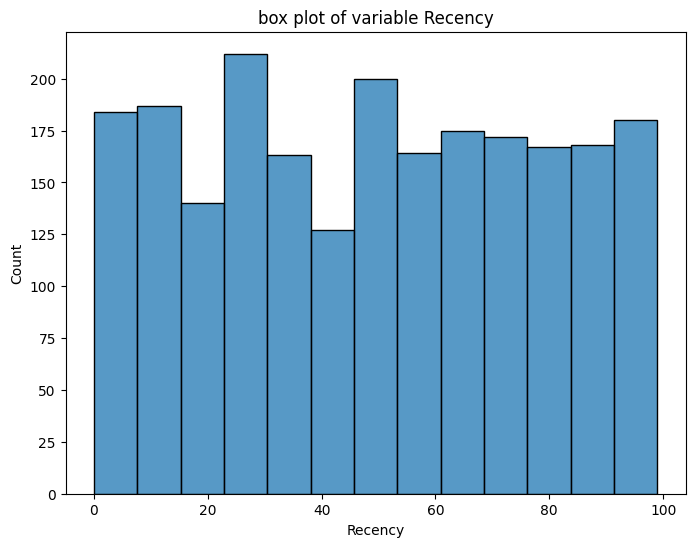

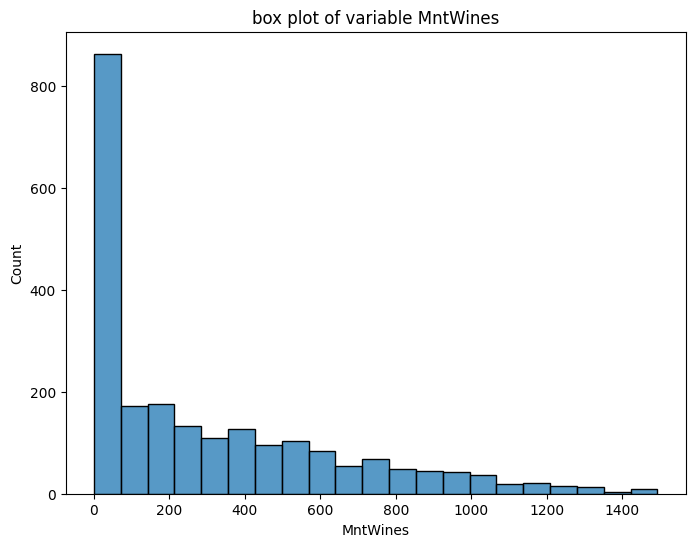

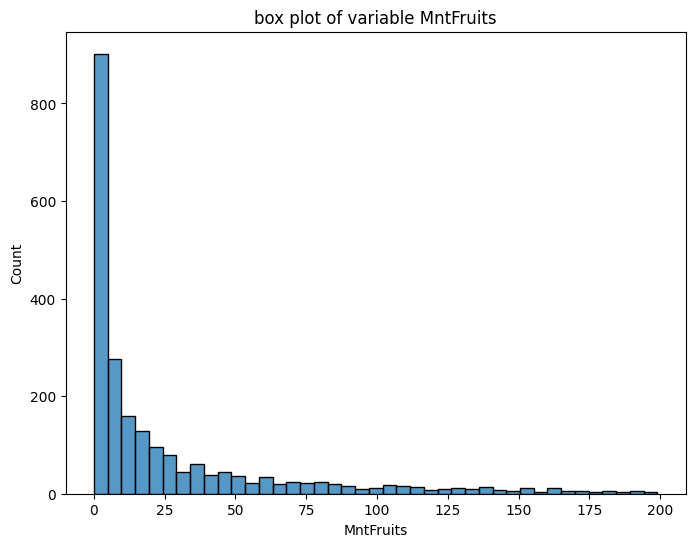

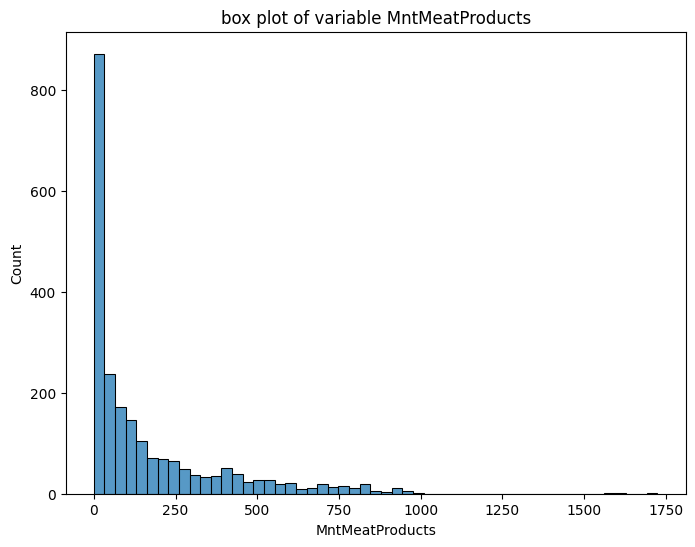

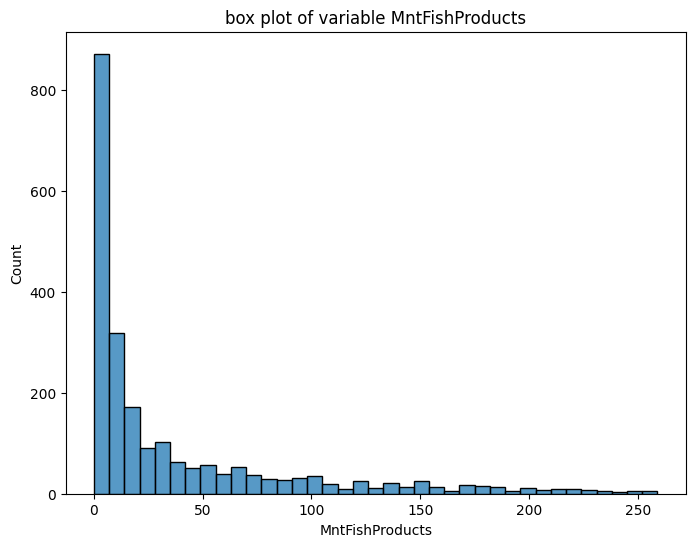

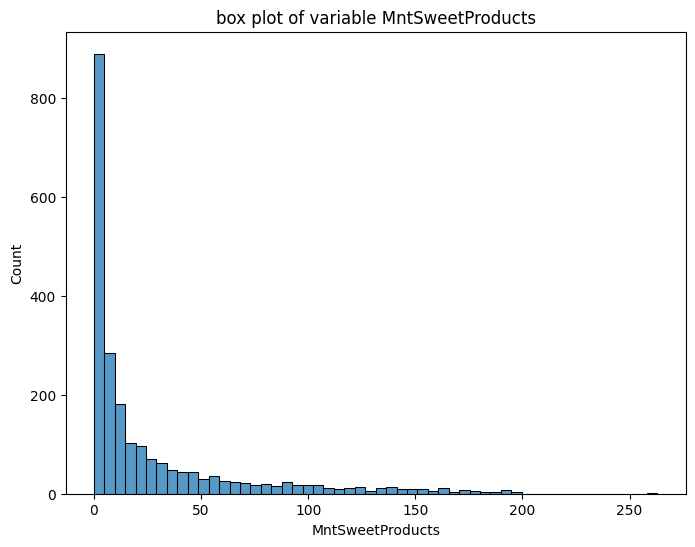

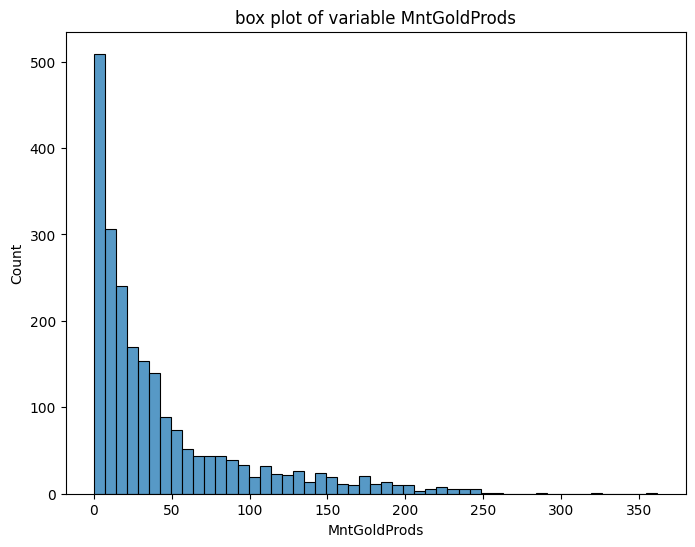

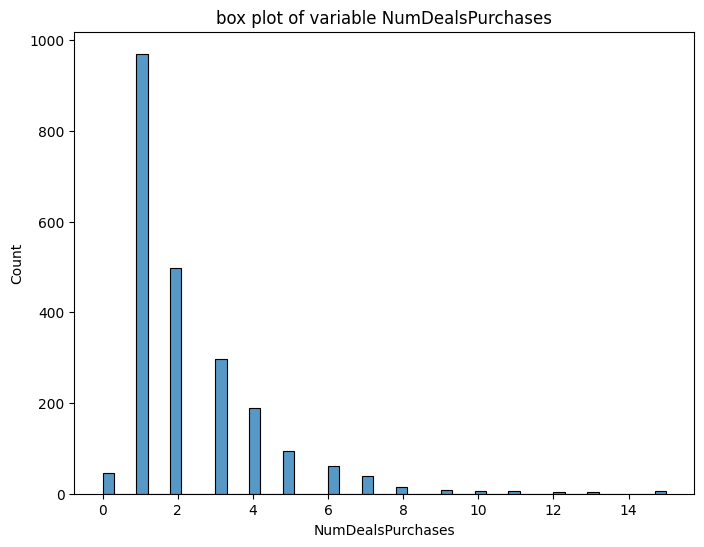

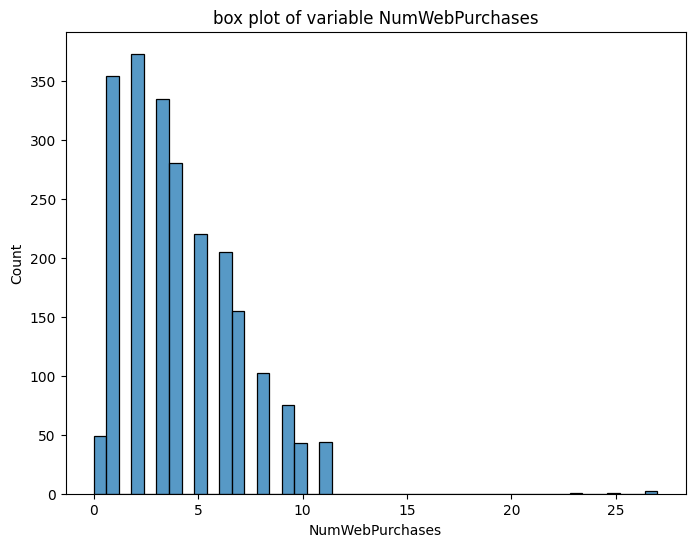

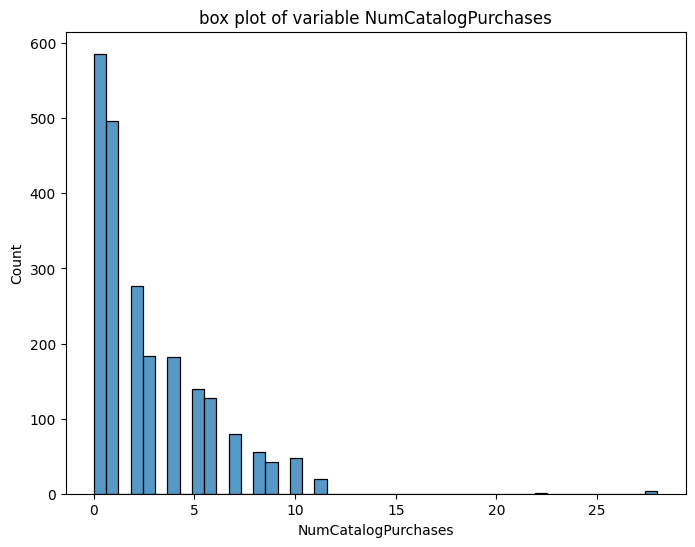

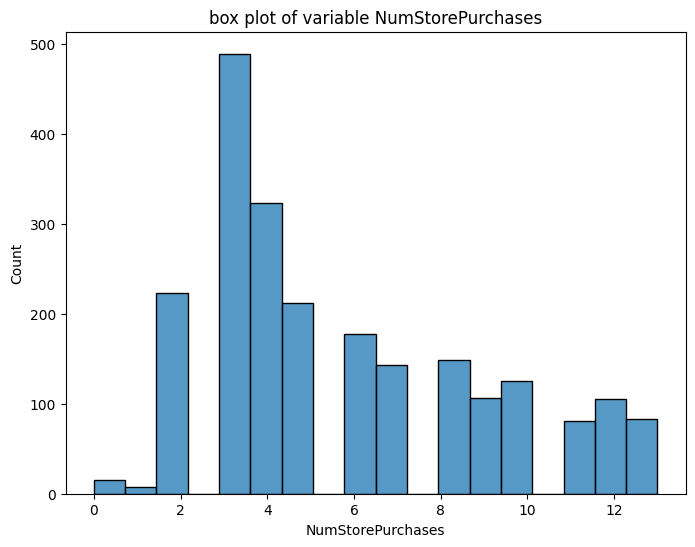

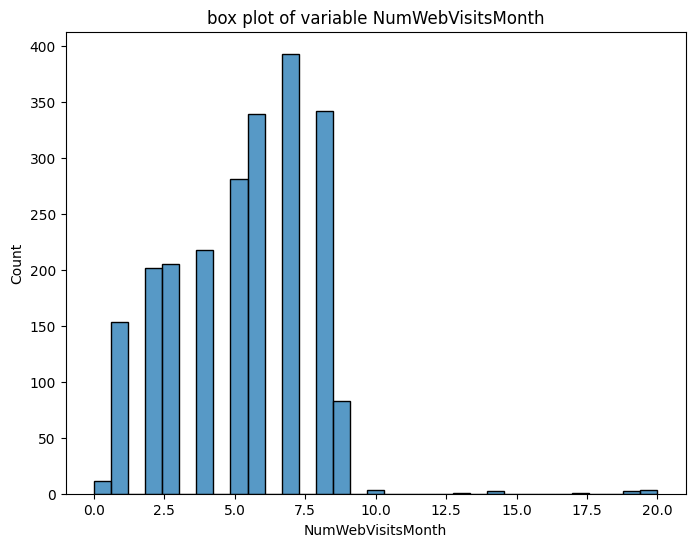

In [ ]:
for variable in selected_variables:
  plt.figure(figsize = (8, 6))
  sns.histplot(data = selected_variables[variable])
  plt.title(f"box plot of variable {variable}")

Checking for the presence of outliers in the dataset

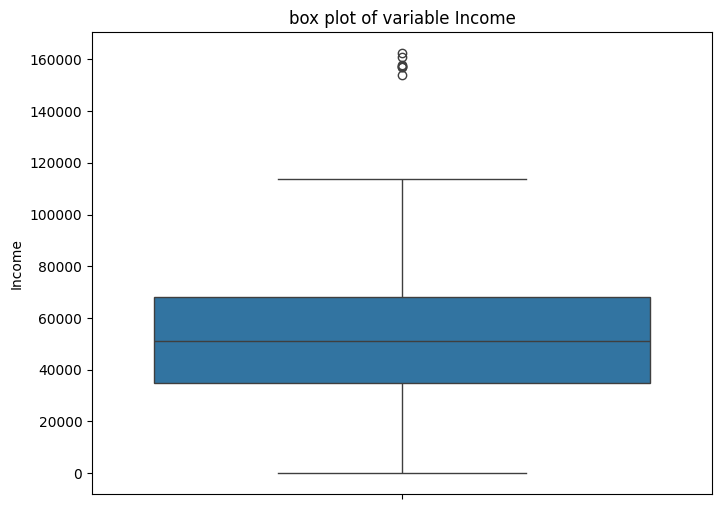

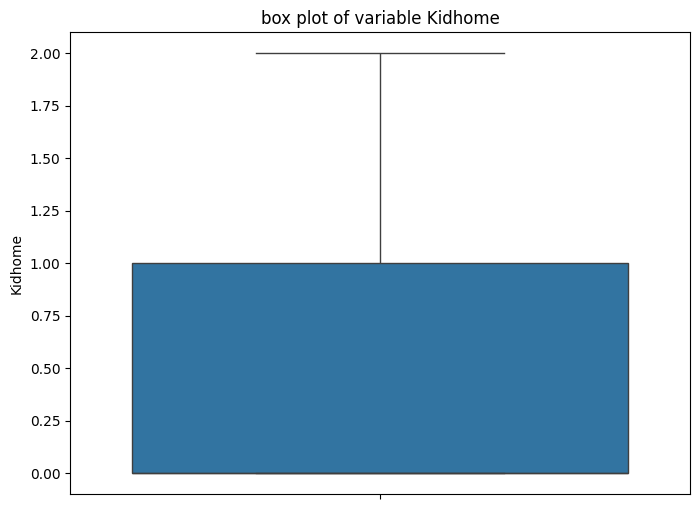

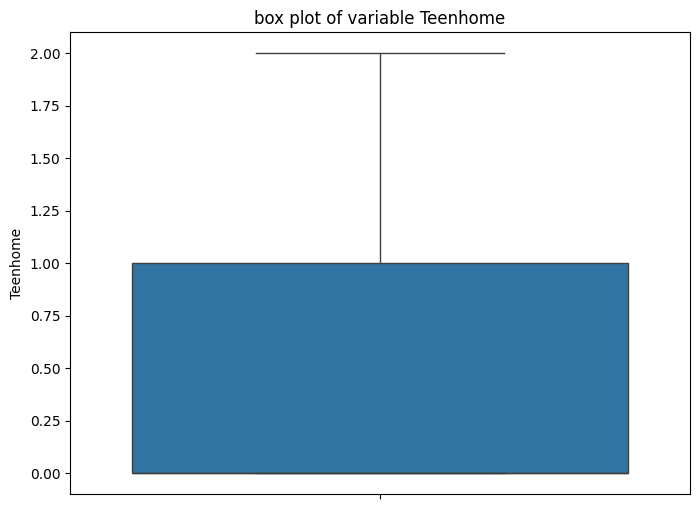

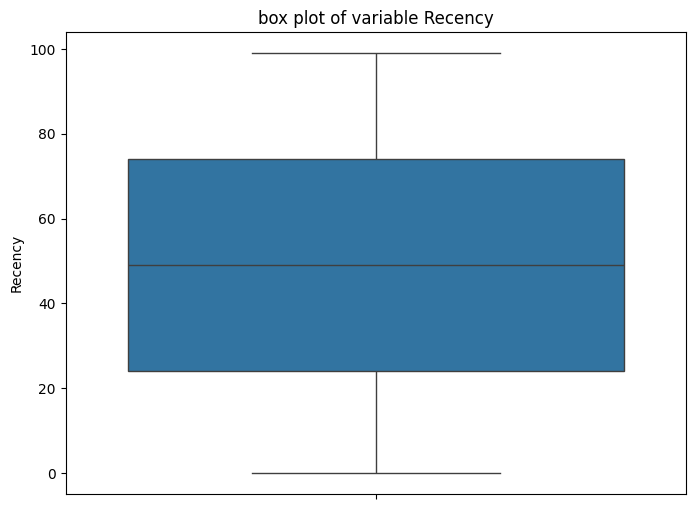

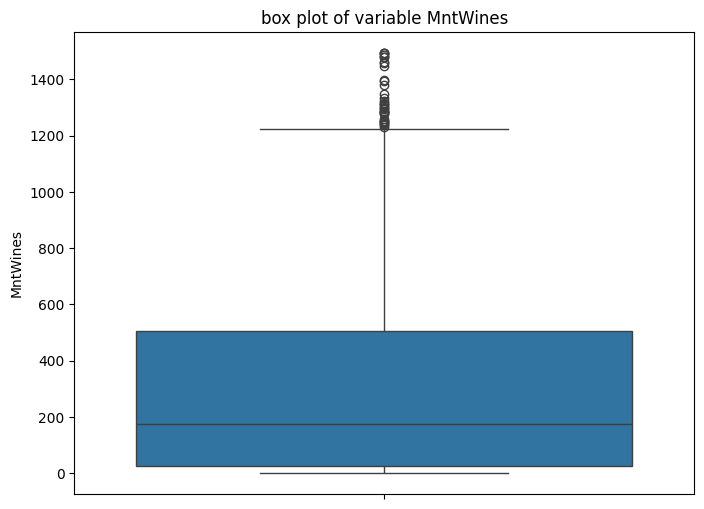

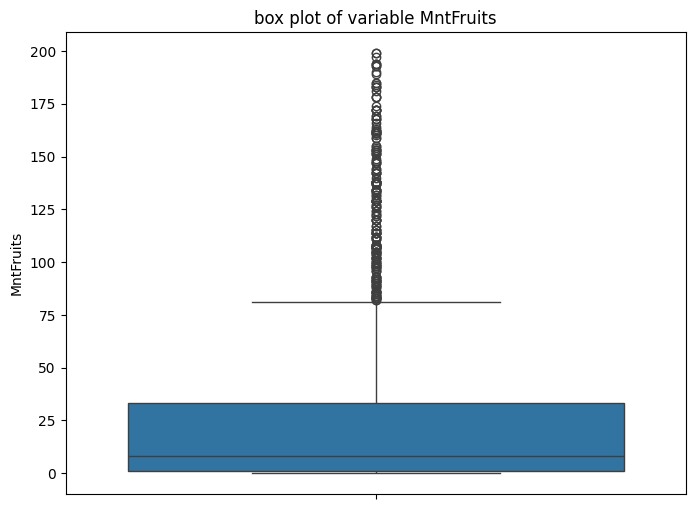

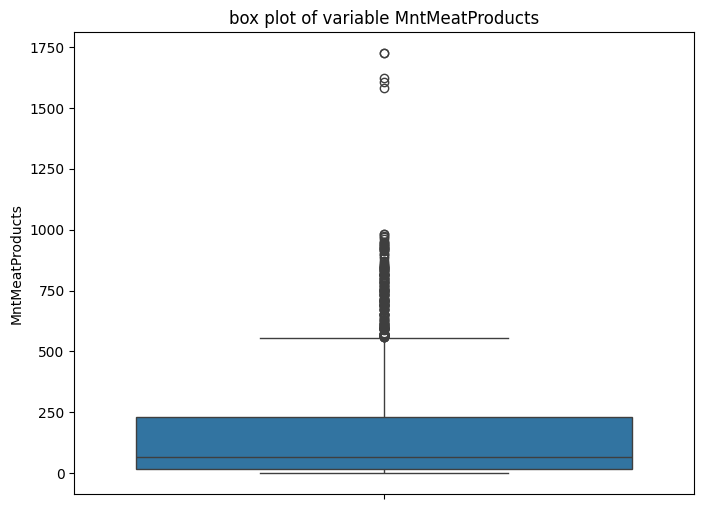

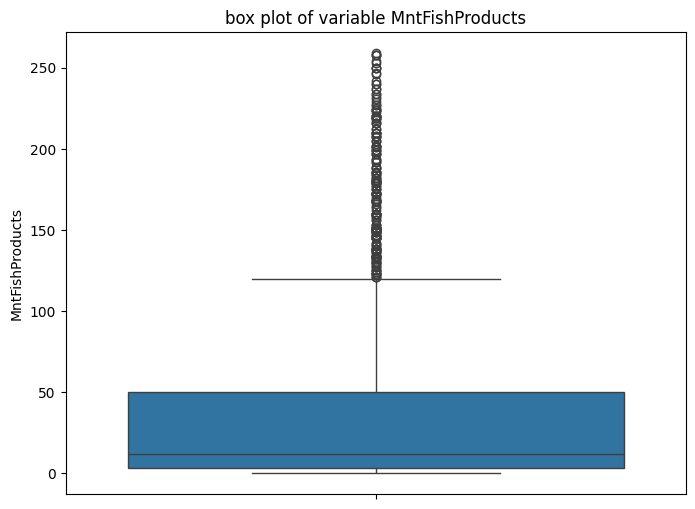

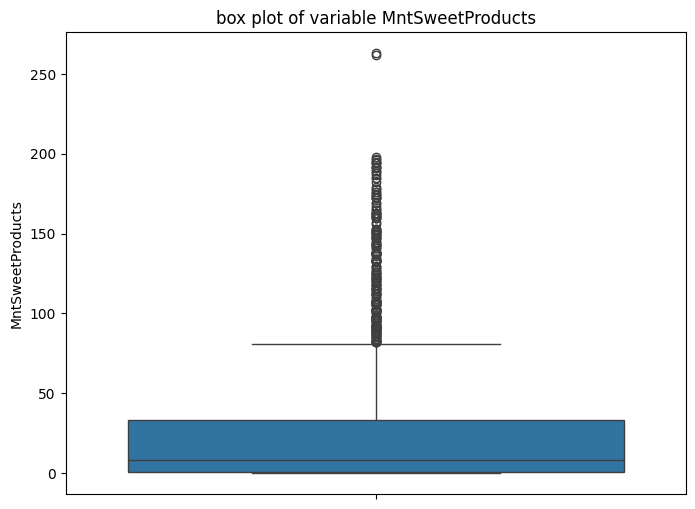

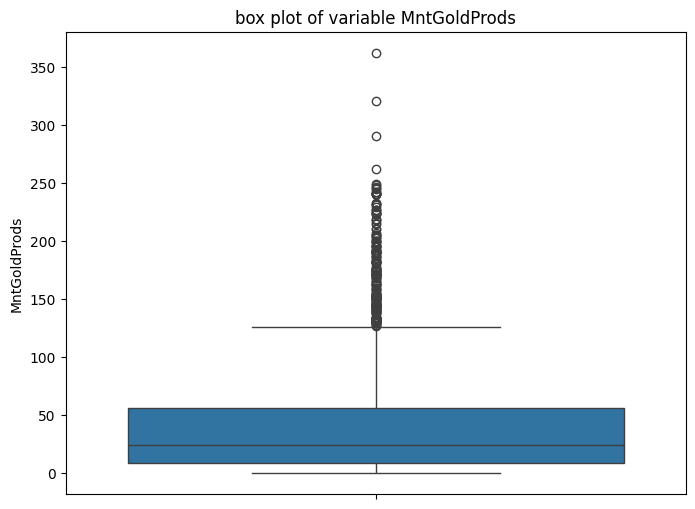

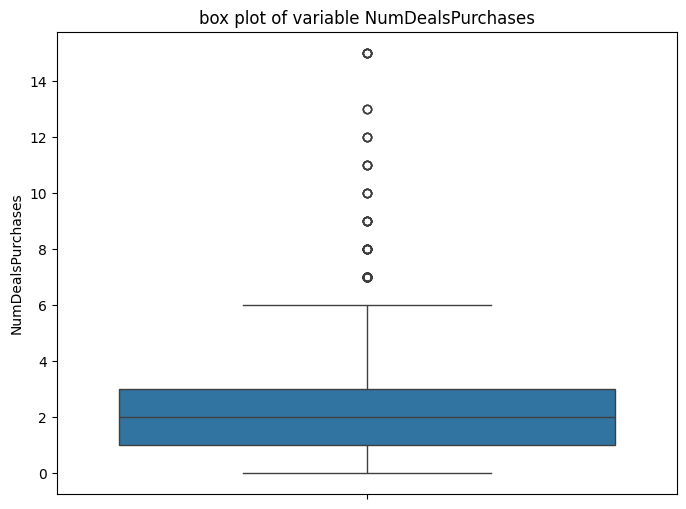

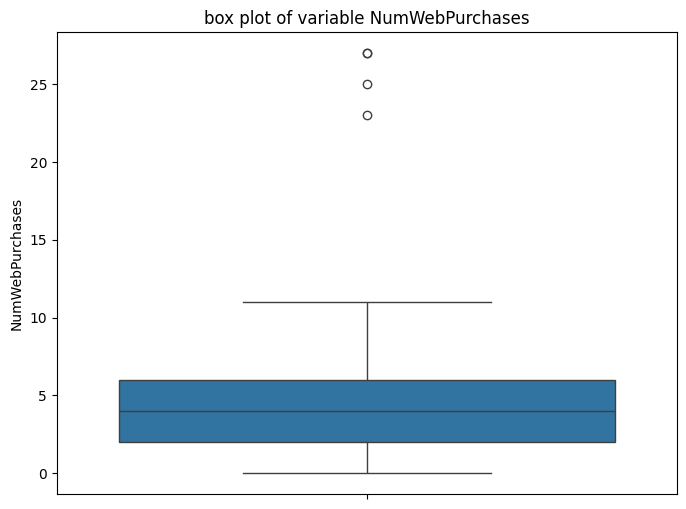

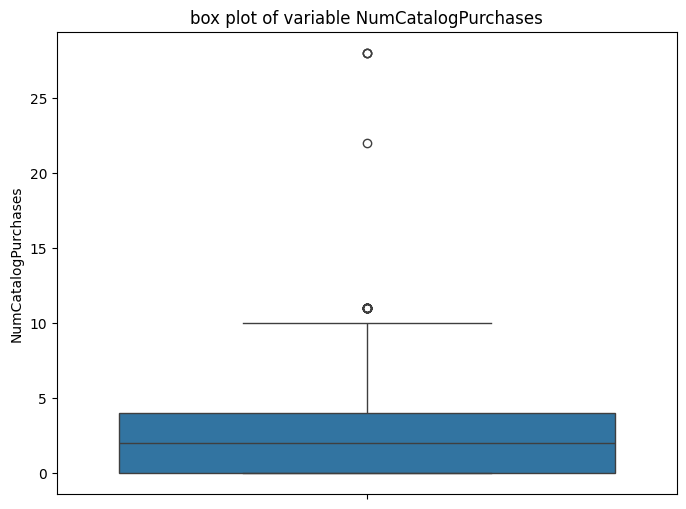

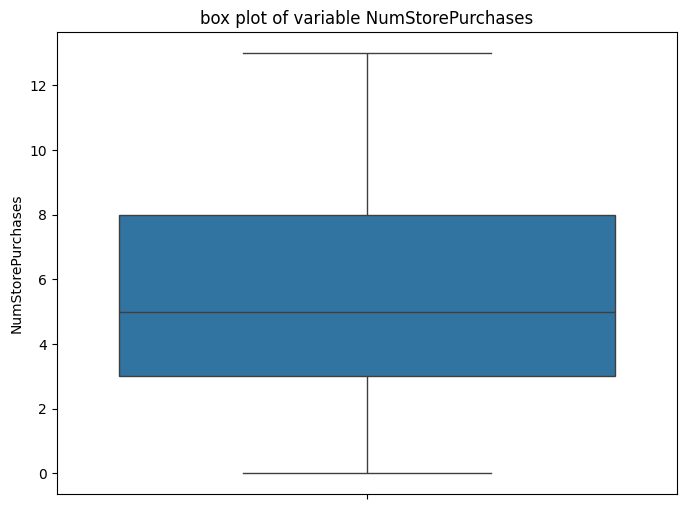

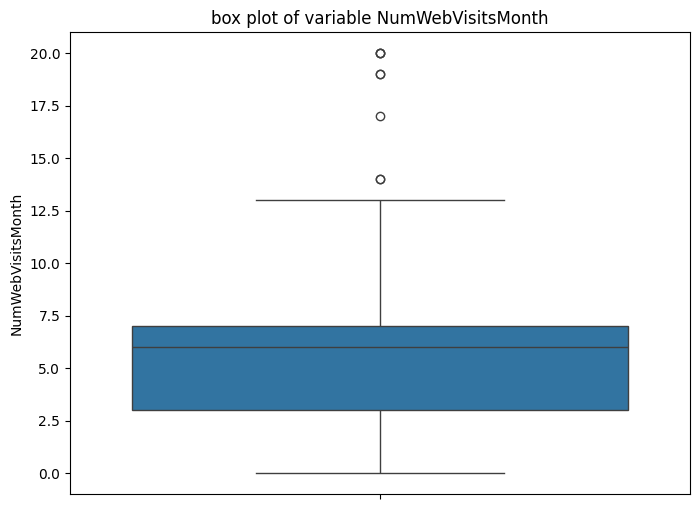

In [ ]:
for variable in selected_variables:
  plt.figure(figsize = (8, 6))
  sns.boxplot(data = selected_variables[variable])
  plt.title(f"box plot of variable {variable}")

Calculating Total number of outliers

In [ ]:
Q1 = summary_df.loc["25%"]
Q3 = summary_df.loc["75%"]

IQR = Q3- Q1
print(IQR)

Income                 33561.5
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
MntWines                 480.5
MntFruits                 32.0
MntMeatProducts          216.0
MntFishProducts           47.0
MntSweetProducts          32.0
MntGoldProds              47.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
dtype: float64


In [ ]:
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" : lower_bound, "UpperBound": upper_bound})
print(bounds_df)

                     LowerBound  UpperBound
Income                -15626.25   118619.75
Kidhome                   -1.50        2.50
Teenhome                  -1.50        2.50
Recency                  -51.00      149.00
MntWines                -696.75     1225.25
MntFruits                -47.00       81.00
MntMeatProducts         -308.00      556.00
MntFishProducts          -67.50      120.50
MntSweetProducts         -47.00       81.00
MntGoldProds             -61.50      126.50
NumDealsPurchases         -2.00        6.00
NumWebPurchases           -4.00       12.00
NumCatalogPurchases       -6.00       10.00
NumStorePurchases         -4.50       15.50
NumWebVisitsMonth         -3.00       13.00


In [ ]:
outliers_lower = (summary_df < lower_bound).sum()
outliers_upper = (summary_df > upper_bound).sum()
total_outliers = outliers_lower  + outliers_upper

ouliers_count_df = pd.DataFrame({"LowerBound_outliers" :outliers_lower, "UpperBound_outliers" :outliers_upper, "Total" : total_outliers})
print(ouliers_count_df)

                     LowerBound_outliers  UpperBound_outliers  Total
Income                                 0                    1      1
Kidhome                                0                    1      1
Teenhome                               0                    1      1
Recency                                0                    1      1
MntWines                               0                    2      2
MntFruits                              0                    2      2
MntMeatProducts                        0                    2      2
MntFishProducts                        0                    2      2
MntSweetProducts                       0                    2      2
MntGoldProds                           0                    2      2
NumDealsPurchases                      0                    2      2
NumWebPurchases                        0                    2      2
NumCatalogPurchases                    0                    2      2
NumStorePurchases                 

Feature engineering

In [ ]:
bins = [0, 5000, 25000, 45000, 65000, 85000, 105000, 125000, 145000, 165000]

labels = ['<=5k', '>5k-25k', '>25k-45k', '>45k-65k', '>65k-85k', '>85k-105k', '>105k-125k', '>125k-145k', '>145-165k']

df['Income_lables'] = pd.cut(df['Income'], bins = bins, labels = labels)

In [ ]:
import datetime
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

In [ ]:
bins = [25, 45, 65, 85, 105, 125, 135]

labels = ['25-45', '>45-65', '>65-85', '>85-105', '>105-125', '>125+']

df['age_labels'] = pd.cut(df['Age'], bins = bins, labels = labels)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_period'] =  (datetime.datetime.now().year - df['Dt_Customer'].dt.year) * 12 + (datetime.datetime.now().month - df['Dt_Customer'].dt.month)

In [ ]:
df['Totalamt_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Total_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

Total amt spent on different products categorized under income labels.

  Income_lables  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0      >65k-85k    350199      32641           215341            47866   
1      >45k-65k    215973      14038            73676            18969   
2     >85k-105k     66082       5841            49390             7832   
3      >25k-45k     39914       4191            21323             6591   
4       >5k-25k      2661       1467             3508             1904   
5     >145-165k       203         22             4957               26   
6          <=5k        27          8             1743                6   
7    >105k-125k      1015        183              107              203   
8    >125k-145k         0          0                0                0   

   MntSweetProducts  MntGoldProds  Totalamt_spent  
0             33792         41565          721404  
1             13547         32050          368253  
2              6624          5705          141474  
3              4109         13304           89432  

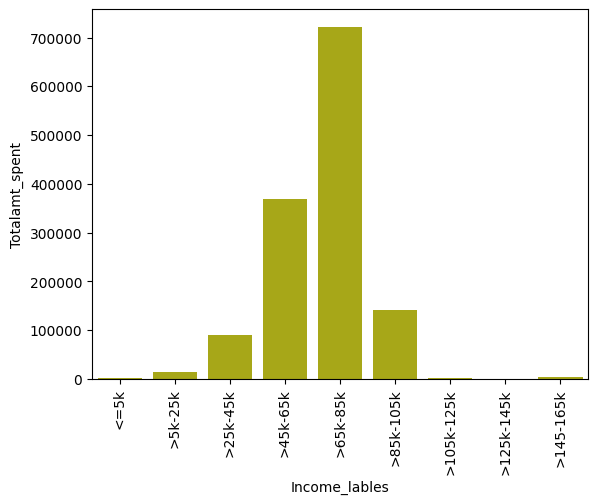

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

Income_label_amt_spent = df.groupby('Income_lables')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Totalamt_spent']].sum()
Income_label_amt_spent = Income_label_amt_spent.sort_values(by = ['Totalamt_spent'], ascending = False).reset_index()
print(Income_label_amt_spent)

sns.barplot(data = Income_label_amt_spent, x = 'Income_lables', y = 'Totalamt_spent', color = 'y')
plt.xticks(rotation = 90)
plt.show()

Type of purchases categorized under income labels.

  Income_lables  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      >65k-85k                970             3122                 3072   
1      >45k-65k               2024             3271                 1646   
2      >25k-45k               1510             1660                  439   
3     >85k-105k                 75              467                  548   
4       >5k-25k                491              468                   99   
5     >145-165k                 30                1                   78   
6          <=5k                 45               25                   28   
7    >105k-125k                  0               36                    8   
8    >125k-145k                  0                0                    0   

   NumStorePurchases  Total_purchases  
0               4945            12109  
1               4229            11170  
2               2292             5901  
3                708             1798  
4                662             1720  

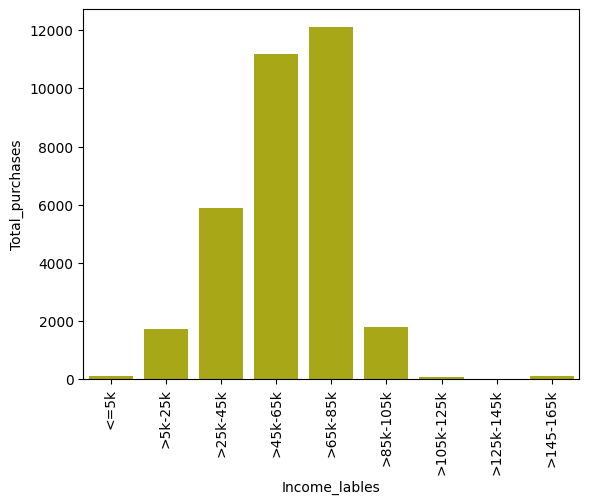

In [ ]:
Income_label_purchases = df.groupby('Income_lables')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_purchases']].sum()
Income_label_purchases = Income_label_purchases.sort_values(by = ['Total_purchases'], ascending = False).reset_index()
print(Income_label_purchases)

sns.barplot(data = Income_label_purchases, x = 'Income_lables', y = 'Total_purchases', color = 'y')
plt.xticks(rotation = 90)
plt.show()

Purchases categorized for number of teenagers and kids in each household

In [ ]:
df.groupby('Teenhome')[['Totalamt_spent', 'Total_purchases']].sum().reset_index()

,Teenhome,Totalamt_spent,Total_purchases
0,0,802199,16061
1,1,524091,16338
2,2,30636,881


In [ ]:
df.groupby('Kidhome')[['Totalamt_spent', 'Total_purchases']].sum().reset_index()

,Kidhome,Totalamt_spent,Total_purchases
0,0,1165330,23395
1,1,184624,9416
2,2,6972,469


Total amt spent on different products categorized under Age labels.

  age_labels  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     >45-65    367850      30701           187090            42260   
1     >65-85    196310      14039           100228            22594   
2      25-45    115869      14013            86057            19077   
3   >105-125       770        150              570              111   
4      >125+         8          0                5                7   
5    >85-105         0          0                0                0   

   MntSweetProducts  MntGoldProds  Totalamt_spent  
0             31383         51898          711182  
1             15432         26147          374750  
2             13737         20301          269054  
3                68           249            1918  
4                 0             2              22  
5                 0             0               0  


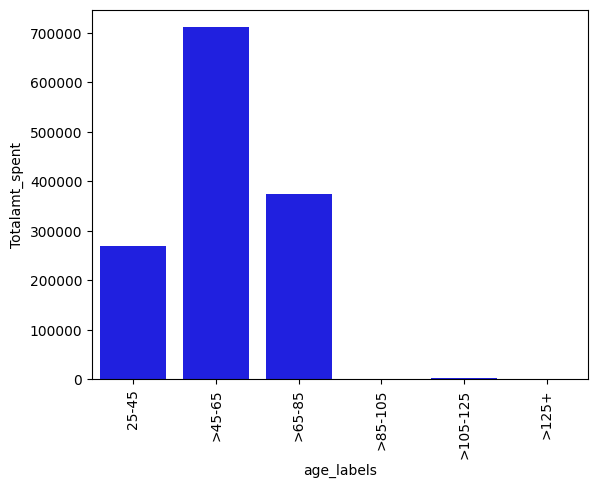

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

Age_label_amt_spent = df.groupby('age_labels')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Totalamt_spent']].sum()
Age_label_amt_spent = Age_label_amt_spent.sort_values(by = ['Totalamt_spent'], ascending = False).reset_index()
print(Age_label_amt_spent)

sns.barplot(data = Age_label_amt_spent, x = 'age_labels', y = 'Totalamt_spent', color = 'b')
plt.xticks(rotation = 90)
plt.show()

Type of purchases categorized under Age labels.

  age_labels  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0     >45-65               3097             5068                 3101   
1     >65-85               1213             2395                 1713   
2      25-45                891             1677                 1141   
3   >105-125                  2                6                    7   
4      >125+                  1                1                    0   
5    >85-105                  0                0                    0   

   NumStorePurchases  Total_purchases  
0               7089            18355  
1               3331             8652  
2               2539             6248  
3                  6               21  
4                  2                4  
5                  0                0  


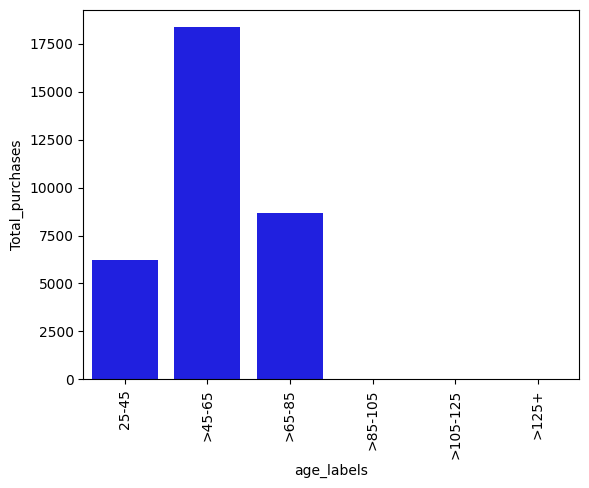

In [ ]:
Age_label_purchases = df.groupby('age_labels')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_purchases']].sum()
Age_label_purchases = Age_label_purchases.sort_values(by = ['Total_purchases'], ascending = False).reset_index()
print(Age_label_purchases)

sns.barplot(data = Age_label_purchases, x = 'age_labels', y = 'Total_purchases', color = 'b')
plt.xticks(rotation = 90)
plt.show()

Type of purchases categorized under different Education levels.

    Education  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0    2n Cycle                456              757                  471   
1       Basic                 97              102                   26   
2  Graduation               2599             4646                 3071   
3      Master                898             1492                  951   
4         PhD               1154             2150                 1443   

   NumStorePurchases  NumWebVisitsMonth  
0               1118               1107  
1                154                371  
2               6567               5953  
3               2182               1916  
4               2946               2556  


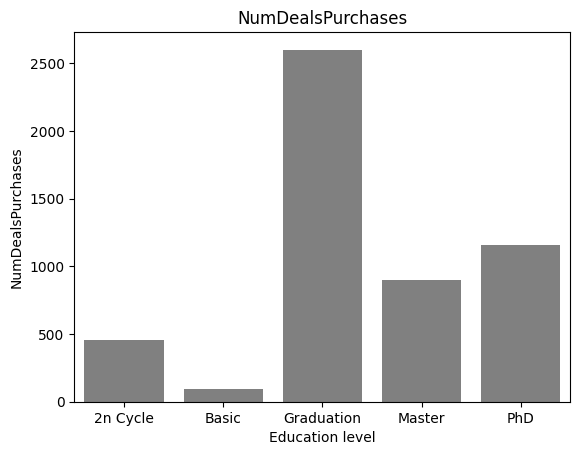

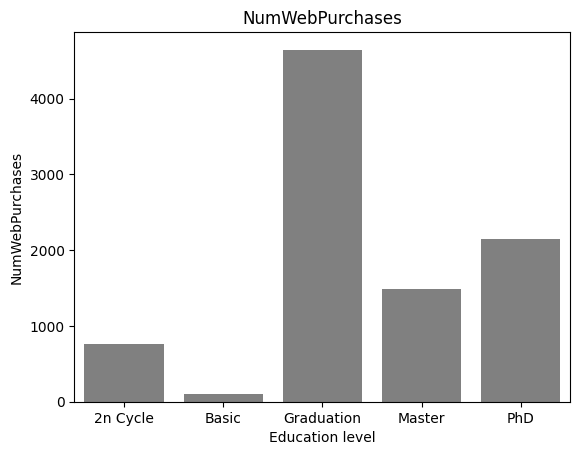

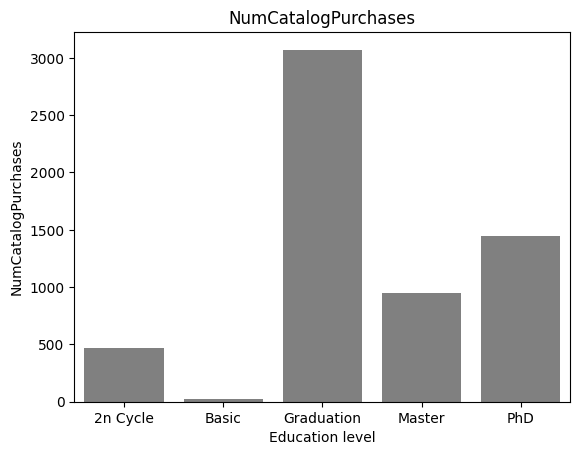

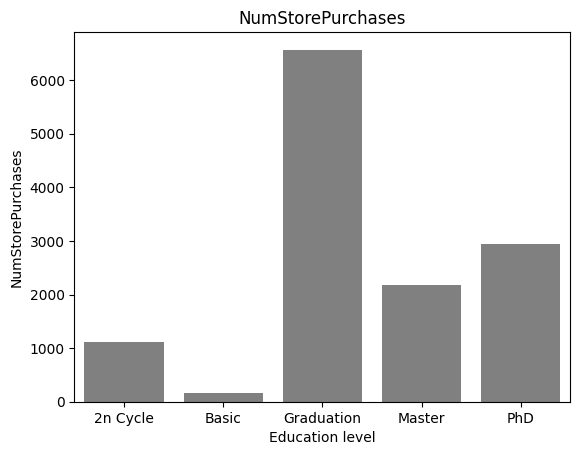

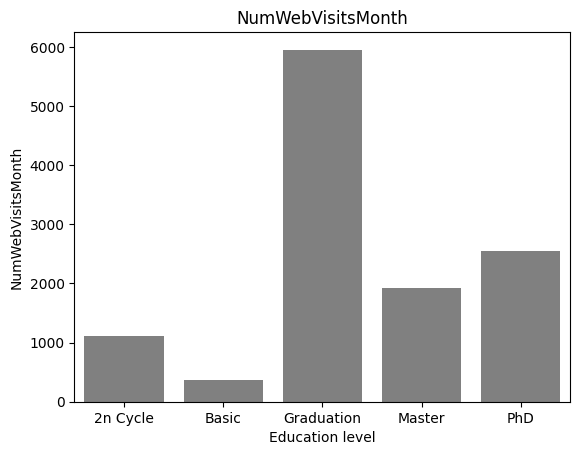

In [ ]:
Purchases_by_Education_level = df.groupby('Education')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()
Purchases_by_Education_level = Purchases_by_Education_level.reset_index()
print(Purchases_by_Education_level)

purchase_types = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for purchase_type in purchase_types:
  sns.barplot(data = Purchases_by_Education_level, x = 'Education', y = purchase_type, color = 'grey')
  plt.title(purchase_type)
  plt.xlabel('Education level')
  plt.show()


Number of customers attracted for each Different campaign

In [ ]:
count_of_offers = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
count_of_offers = count_of_offers.reset_index()
count_of_offers.columns = ['Campaign', 'count']
count_of_offers

,Campaign,count
0,AcceptedCmp1,144
1,AcceptedCmp2,30
2,AcceptedCmp3,163
3,AcceptedCmp4,167
4,AcceptedCmp5,163


Total number of Complaints

In [ ]:
Total_complaints = df['Complain'].sum()
Total_complaints

21

Total amt spent withrespect to customer period. (in months)

    Customer_period  Totalamt_spent  Total_purchases
0               144           92046             2026
1               143           85492             1812
2               141           77190             1722
3               135           72954             1593
4               139           71351             1789
5               138           68879             1671
6               137           67322             1667
7               130           66221             1704
8               142           64802             1598
9               129           60064             1394
10              136           58135             1369
11              132           55393             1478
12              123           54648             1475
13              133           49986             1358
14              128           49455             1243
15              127           48932             1306
16              134           48171             1335
17              131           47432           

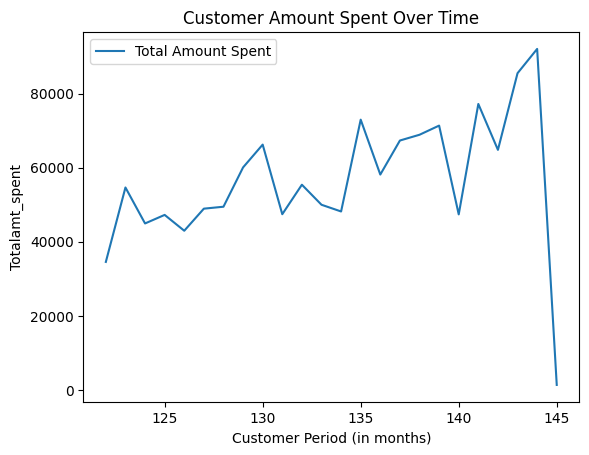

In [ ]:
customer_purchases_wtr_period = df.groupby('Customer_period')[['Totalamt_spent', 'Total_purchases']].sum()
customer_purchases_wtr_period = customer_purchases_wtr_period.sort_values(by = ['Totalamt_spent'], ascending = False).reset_index()
print(customer_purchases_wtr_period)

sns.lineplot(data=customer_purchases_wtr_period, x='Customer_period', y='Totalamt_spent', label='Total Amount Spent')
plt.title('Customer Amount Spent Over Time')
plt.xlabel('Customer Period (in months)')
plt.show()

Total amt spent and mean amt spent for each country

  country  Total_amt_spent  mean_amt_spent
0      ME             3122     1040.666667
1      CA           168532      628.850746
2      SA           211009      628.002976
3     GER            74913      624.275000
4      US            67882      622.770642
5      SP           662220      604.767123
6     AUS            89763      561.018750
7     IND            79485      537.060811


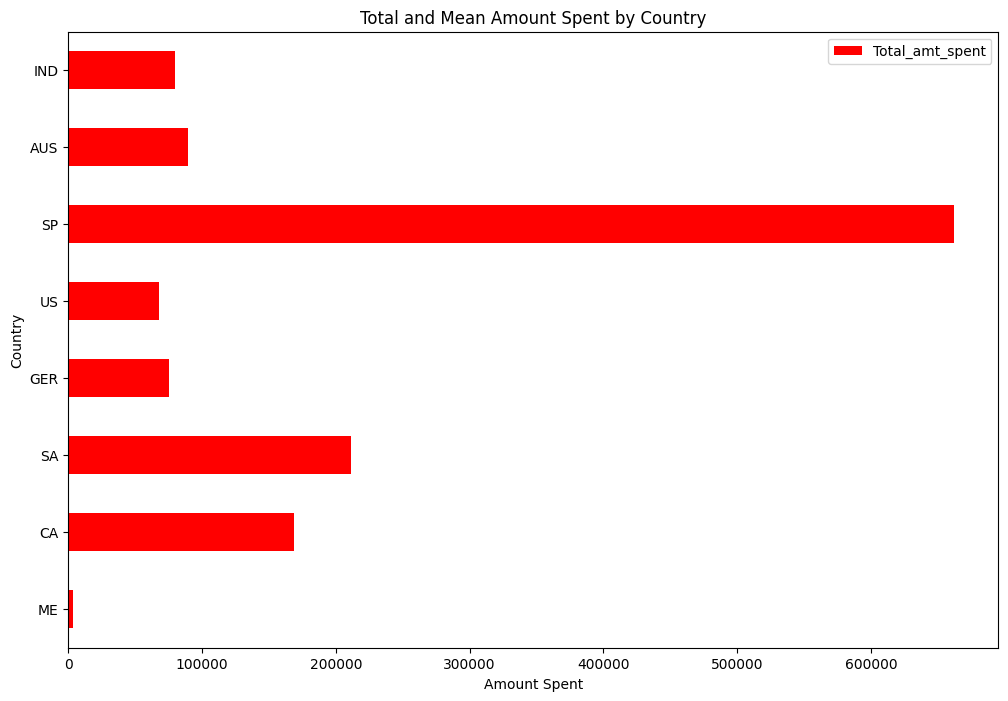

In [ ]:
Country_purchases = df.groupby('Country')['Totalamt_spent'].aggregate({'sum', 'mean'})
Country_purchases = Country_purchases.sort_values(by = ['mean'], ascending = False).reset_index()
Country_purchases.columns = ['country', 'Total_amt_spent', 'mean_amt_spent']
print(Country_purchases)

Country_purchases.plot(kind='barh', x='country', y='Total_amt_spent', figsize=(12, 8), color = 'r')
plt.title('Total and Mean Amount Spent by Country')
plt.xlabel('Amount Spent')
plt.ylabel('Country')
plt.show()

Hypothesis testing

Is income of customers dependent on their education

In [ ]:
from scipy.stats import f_oneway

alpha = 0.05
 # HO: The means of Incomes between different education levels would be equal
 # H1: The means of Incomes between different education levels would be not equal

education_groups = [group['Income'].values for name, group in df.groupby('Education')]

f_statistic, p_value = f_oneway(*education_groups)
print(f_statistic, p_value)
print("<------------------->")
if p_value < 0.05:
    print("Reject the null hypothesis. Income depends on education level.")
else:
    print("Fail to reject null hypothesis : Income doesn't depend on Education levels.")

35.42763066856272 9.87796950058819e-29
<------------------->
Reject the null hypothesis. Income depends on education level.


Do higher income people spend more (take in account spending in all categories together)

In [ ]:
import scipy.stats as stats

corr_coefficient, p_value = stats.pearsonr(df['Income'], df['Totalamt_spent'])

print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

print("<---------------->")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant linear relationship between income and purchases.")
else:
    print("Fail to reject the null hypothesis. No significant linear relationship exists between income and purchases.")

Pearson correlation coefficient: 0.7706290398754154
P-value: 0.0
<---------------->
Reject the null hypothesis. There is a significant linear relationship between income and purchases.


Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')

In [ ]:
df['Living_Status'] = df['Marital_Status'].apply(lambda x: 'Couple' if x in ['Married', 'Together'] else 'Alone')

wine_spending_couples = df[df['Living_Status'] == 'Couple']['MntWines']
wine_spending_alone = df[df['Living_Status'] == 'Alone']['MntWines']

import scipy.stats as stats

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(wine_spending_couples, wine_spending_alone, equal_var=False)  # Use equal_var=False if variances are unequal

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

print("<-------------------->")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in wine spending between couples and people living alone.")
else:
    print("Fail to reject the null hypothesis. No significant difference in wine spending exists between couples and people living alone.")

T-statistic: -0.2711337908368919
P-value: 0.7863223090103292
<-------------------->
Fail to reject the null hypothesis. No significant difference in wine spending exists between couples and people living alone.


Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)

In [ ]:
median_income = df['Income'].median()

df['Income_Bracket'] = df['Income'].apply(lambda x: 'Below_Median' if x < median_income else 'Above_Median')

df['Accepted_Any_Campaign'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Income_Bracket'], df['Accepted_Any_Campaign'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

print("<----------------->")

if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between income level and campaign acceptance.")
else:
    print("Fail to reject the null hypothesis. No significant association between income level and campaign acceptance.")

Chi-Square statistic: 138.8199834041559
P-value: 4.8224046007539564e-32
<----------------->
Reject the null hypothesis. There is a significant association between income level and campaign acceptance.


In [3]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/E-commerce-Campaign dataset@DhanunjayaReddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/E-commerce-Campaign dataset@DhanunjayaReddy.ipynb to pdf
[NbConvertApp] Support files will be in E-commerce-Campaign dataset@DhanunjayaReddy_files/
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making directory ./E-commerce-Campaign dataset@DhanunjayaReddy_files
[NbConvertApp] Making 